In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv('Dataset/laptop_data.csv')

In [3]:
data.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


 #### No null values mostly categorical values 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [3]:
data.drop(columns = ['Unnamed: 0'],inplace = True)

In [14]:
print(data['Company'].value_counts())
print("---"*10)
print(data['Ram'].value_counts())

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
------------------------------
Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64


In [23]:
print(data['TypeName'].value_counts())
print("---"*10)
print(data['Inches'].value_counts())

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
------------------------------
Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64


In [24]:
print(data['OpSys'].value_counts())
print("---"*10)
print(data['Weight'].value_counts())

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64
------------------------------
Weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64


<Axes: xlabel='OpSys'>

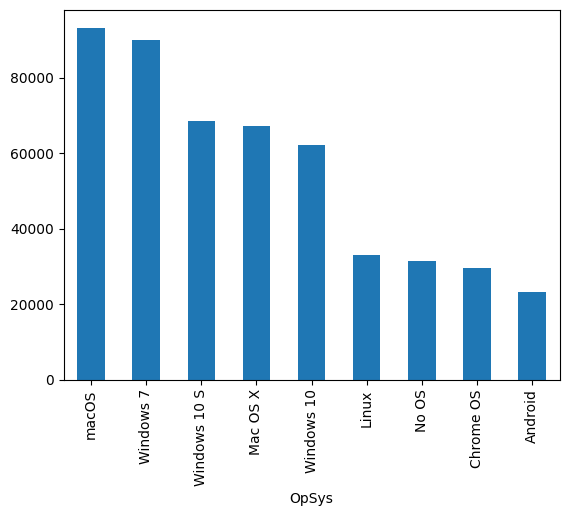

In [124]:
data.groupby('OpSys')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='Company'>

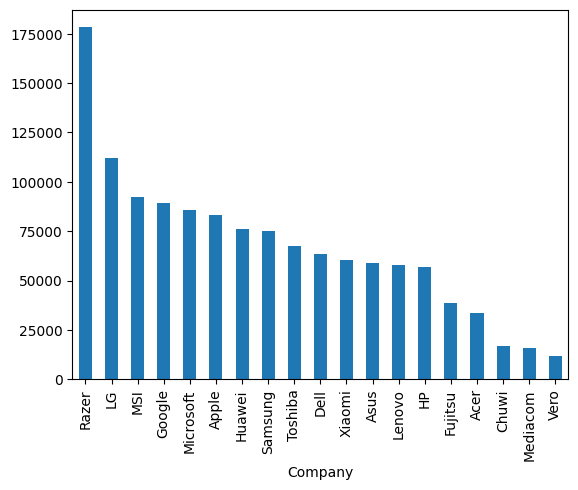

In [123]:
data.groupby('Company')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='TypeName'>

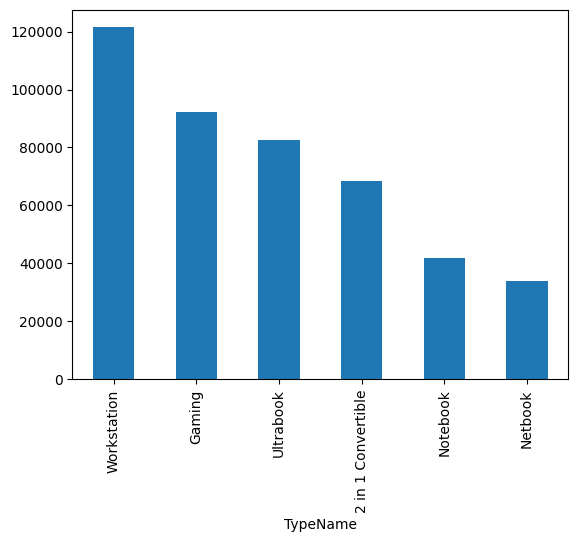

In [121]:
data.groupby('TypeName')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [4]:
data['Ram'] = data['Ram'].str.replace('GB','').astype('int')

In [5]:
data['Weight'] = data['Weight'].str.replace('kg','').astype('f')

<Axes: >

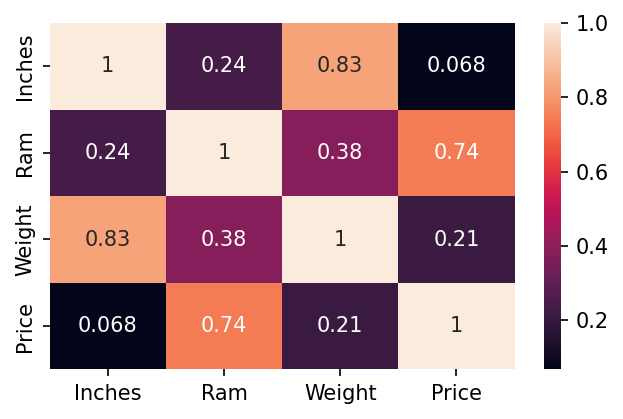

In [8]:
plt.figure(figsize = (5,3),dpi = 150)
sns.heatmap(data.corr(numeric_only = True),annot = True)

In [113]:
data.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
235,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon R7 M445,Linux,2.36,47898.72
548,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,21152.16
749,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.00,233845.92
852,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Linux,2.83,46087.20


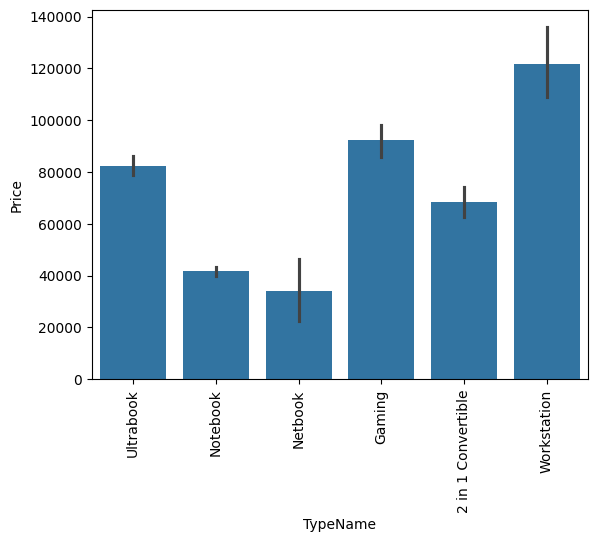

In [9]:
plt.xticks(rotation = 'vertical')
sns.barplot(x = data['TypeName'],y = data['Price'])
plt.show()

<Axes: xlabel='OpSys', ylabel='Price'>

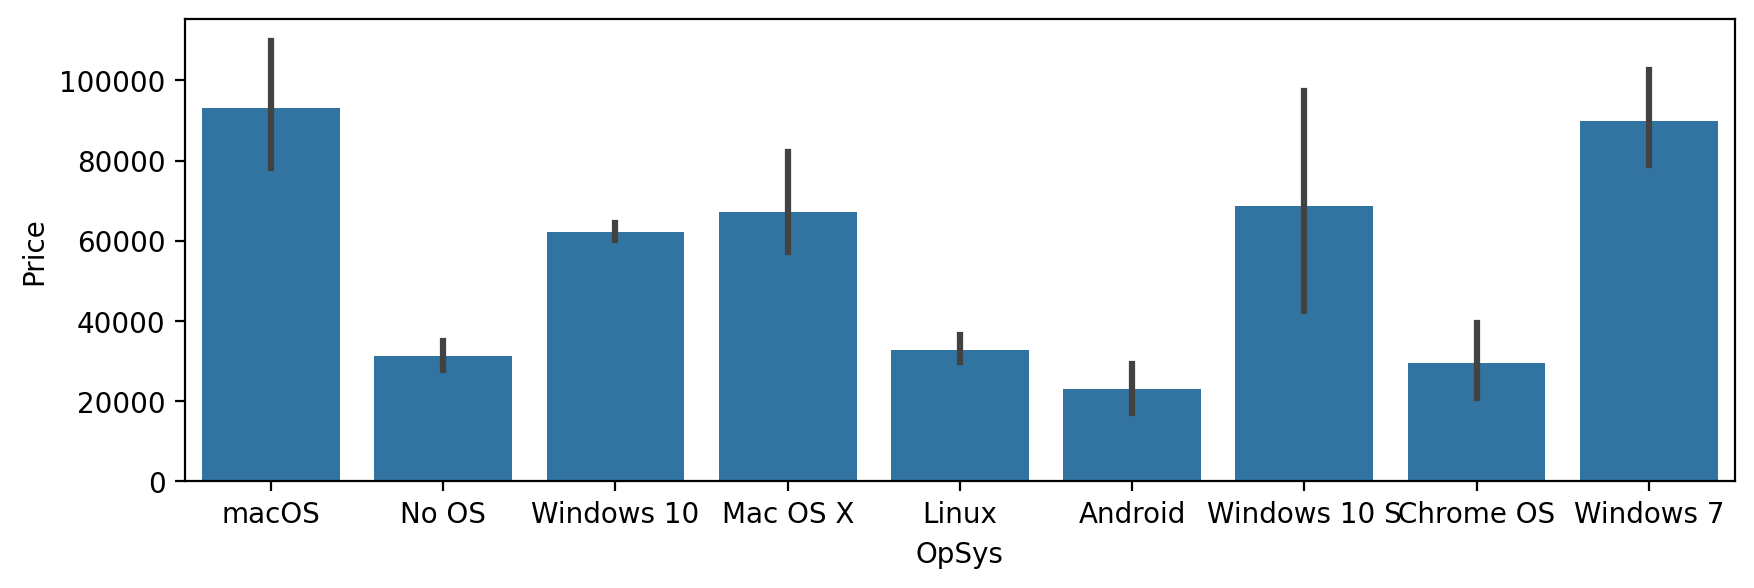

In [10]:
plt.figure(figsize = (10,3),dpi = 200)
sns.barplot(x = data['OpSys'],y = data['Price'])

In [131]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [135]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

<Axes: xlabel='Company', ylabel='Price'>

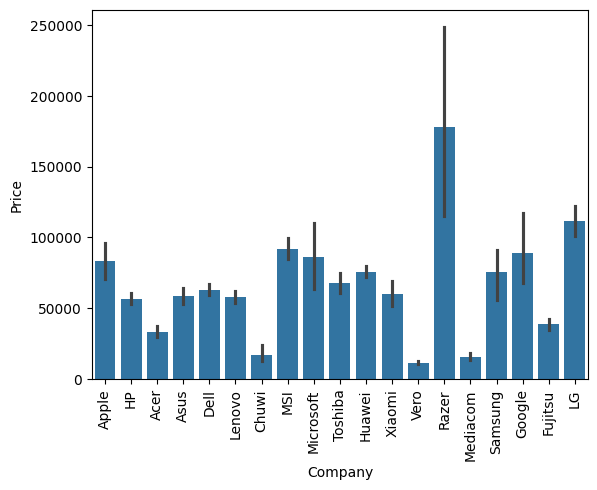

In [140]:
plt.xticks(rotation = 'vertical')
sns.barplot(x = data['Company'], y = data['Price'])

<Axes: xlabel='TypeName'>

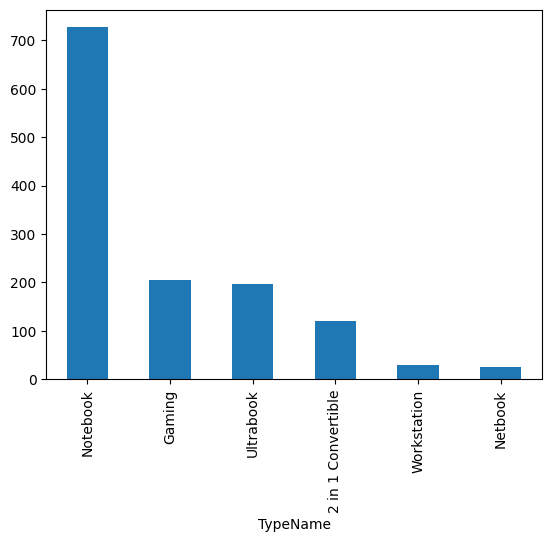

In [145]:
data['TypeName'].value_counts().plot(kind = 'bar')

In [6]:
data['Touchscreen'] = data['ScreenResolution'].str.contains('Touchscreen').astype('int')

In [156]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [7]:
data['x_res'] = data['Inches']
data['y_res'] = data['Inches']

In [8]:

for i in range(data.shape[0]):
    data['x_res'][i] = data['ScreenResolution'].str.split(' ')[i][-1].split('x')[0]
    data['y_res'][i] = data['ScreenResolution'].str.split(' ')[i][-1].split('x')[1]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20252\182476415.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['x_res'][i] = data['ScreenResolution'].str.split(' ')[i][-1].split('x')[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_202

In [16]:
data['ScreenResolution'].str.split(' ').str[-1].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '1920x1200', '2256x1504', '3840x2160',
       '2160x1440', '2560x1440', '1600x900', '2736x1824', '2400x1600'],
      dtype=object)

In [12]:
data['x_res'] = data['x_res'].astype('int')
data['y_res'] = data['y_res'].astype('int')

In [13]:
data['Resolution'] = data['x_res']*data['y_res']
# data.drop(columns = ['Resolution'],inplace = True)

In [14]:
data.drop(columns = ['x_res','y_res'],inplace = True)

In [15]:
data['ips'] = data['ScreenResolution'].str.contains('IPS').astype('int')

<Axes: xlabel='ips'>

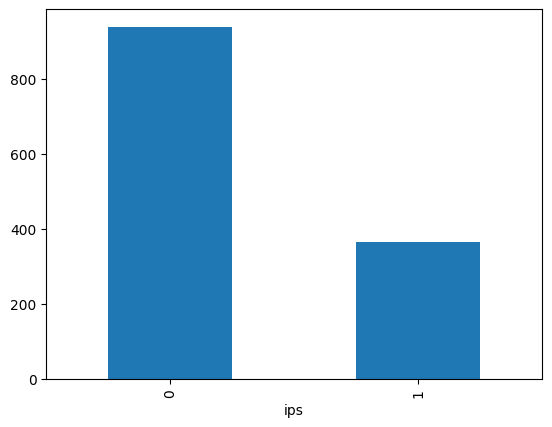

In [80]:
data['ips'].value_counts().plot(kind = 'bar')

In [309]:
data.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,Full HD,Resolution,Ghz,Cpu_name,Cpu Brand
620,HP,Notebook,14.0,1366x768,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.31,59886.720,0,0,0,1049088,2.6,Intel Core i5,Intel Core i5
497,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,1TB SSD,Intel HD Graphics 620,Windows 10,1.48,93186.720,0,0,1,2073600,2.8,Intel Core i7,Intel Core i7
723,Dell,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,194972.832,0,0,0,8294400,2.8,Intel Core i7,Intel Core i7
941,Asus,Notebook,17.3,1600x900,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.80,28238.400,0,0,0,1440000,1.6,Intel Pentium Quad,Other Intel


In [280]:
data.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
ips            0.252208
Full HD        0.198612
Resolution     0.515486
Ghz            0.430293
Name: Price, dtype: float64

In [17]:
data['Full HD'] = data['ScreenResolution'].str.contains('Full HD').astype('int')

In [222]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [18]:
data['Ghz'] = data['Cpu'].str.split(' ').str[-1].str.split('GHz').str[0]

In [19]:
data['Ghz'] = data['Ghz'].astype('f')

In [20]:
data['Cpu_name'] = data['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))

In [20]:
data[data['Cpu_name'].str.contains('Intel')]['Cpu_name'].value_counts()

Cpu_name
Intel Core i7          527
Intel Core i5          423
Intel Core i3          136
Intel Celeron Dual      80
Intel Pentium Quad      27
Intel Core M            19
Intel Celeron Quad       8
Intel Atom x5-Z8350      5
Intel Atom x5-Z8550      4
Intel Pentium Dual       3
Intel Xeon E3-1505M      2
Intel Xeon E3-1535M      2
Intel Atom X5-Z8350      2
Intel Atom x5-Z8300      1
Intel Atom Z8350         1
Name: count, dtype: int64

In [21]:
def cpu_feature(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return text
    elif 'Intel' in text:
        return 'Other Intel'
    else:
        return 'AMD'

In [22]:
data['Cpu Brand'] = data['Cpu_name'].apply(cpu_feature)

<Axes: xlabel='Cpu Brand'>

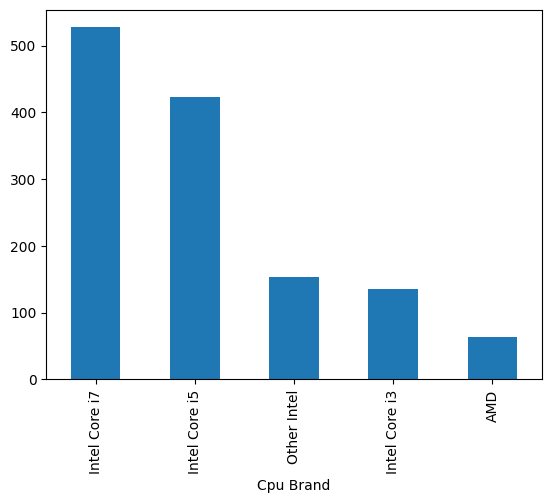

In [23]:
data['Cpu Brand'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Cpu Brand', ylabel='Price'>

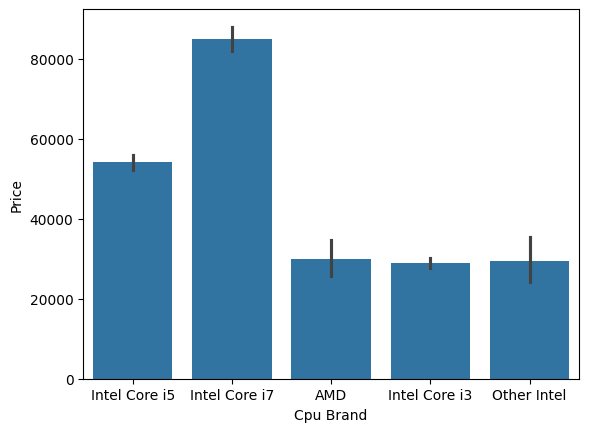

In [308]:
sns.barplot(x = data['Cpu Brand'] , y = data['Price'])

In [23]:
data.drop(columns = ['Cpu','Cpu_name'],inplace = True)

In [89]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,ips,Full HD,Ghz,Cpu Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,4096000,1,0,2.3,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1296000,0,0,1.8,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2073600,0,1,2.5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,5184000,1,0,2.7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,4096000,1,0,3.1,Intel Core i5


In [24]:
data['Memory'] = data['Memory'].replace({'1TB':'1000GB','1.0TB':'1000GB','2TB':'2000GB'},regex=True)

In [25]:
import re

def clean_storage(text):
    ssd = hdd = flash = hybrid = 0

    # Replace TB with GB for uniformity
    # text = text.replace('1.0TB', '1000GB').replace('2TB', '2000GB').replace('1TB', '1000GB').replace('512GB', '512GB')
    # text = text.replace('1TB HDD', '1000GB HDD').replace('2TB HDD', '2000GB HDD')  # just in case
    # text = text.replace('1TB SSD', '1000GB SSD').replace('2TB SSD', '2000GB SSD')  # just in case

    # Split by '+'
    parts = text.split('+')
    for part in parts:
        part = part.strip()
        # Match number and unit
        match = re.search(r'(\d+)\s*GB\s*(SSD|HDD|Flash|Hybrid)', part, re.IGNORECASE)
        if match:
            size = int(match.group(1))
            type_ = match.group(2).lower()
            if 'ssd' in type_:
                ssd += size
            elif 'hdd' in type_:
                hdd += size
            elif 'flash' in type_:
                flash += size
            elif 'hybrid' in type_:
                hybrid += size
    return pd.Series([ssd, hdd, flash, hybrid])


In [26]:
data[['SSD_GB', 'HDD_GB', 'Flash_GB', 'Hybrid_GB']] = data['Memory'].apply(clean_storage)

In [32]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [27]:
data['Gpu Brand'] = data['Gpu'].str.split().str[0]

In [28]:
data = data[data['Gpu Brand'] != 'ARM']

In [29]:
def opsys(text):
    if text in ['Windows 10', 'Windows 7', 'Windows 10 S']:
        text = 'Windows'
        return text
    elif text in ['macOS', 'Mac OS X']:
        text = 'MacOS'
        return text
    else:
        text = 'Other'
        return text

In [30]:
data['OpSys'] = data['OpSys'].apply(opsys)

In [37]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,Resolution,ips,Full HD,Ghz,Cpu Brand,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB,Gpu Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,MacOS,1.37,71378.6832,...,4096000,1,0,2.3,Intel Core i5,128,0,0,0,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,MacOS,1.34,47895.5232,...,1296000,0,0,1.8,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,Other,1.86,30636.0000,...,2073600,0,1,2.5,Intel Core i5,256,0,0,0,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,MacOS,1.83,135195.3360,...,5184000,1,0,2.7,Intel Core i7,512,0,0,0,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,MacOS,1.37,96095.8080,...,4096000,1,0,3.1,Intel Core i5,256,0,0,0,Intel


<Axes: >

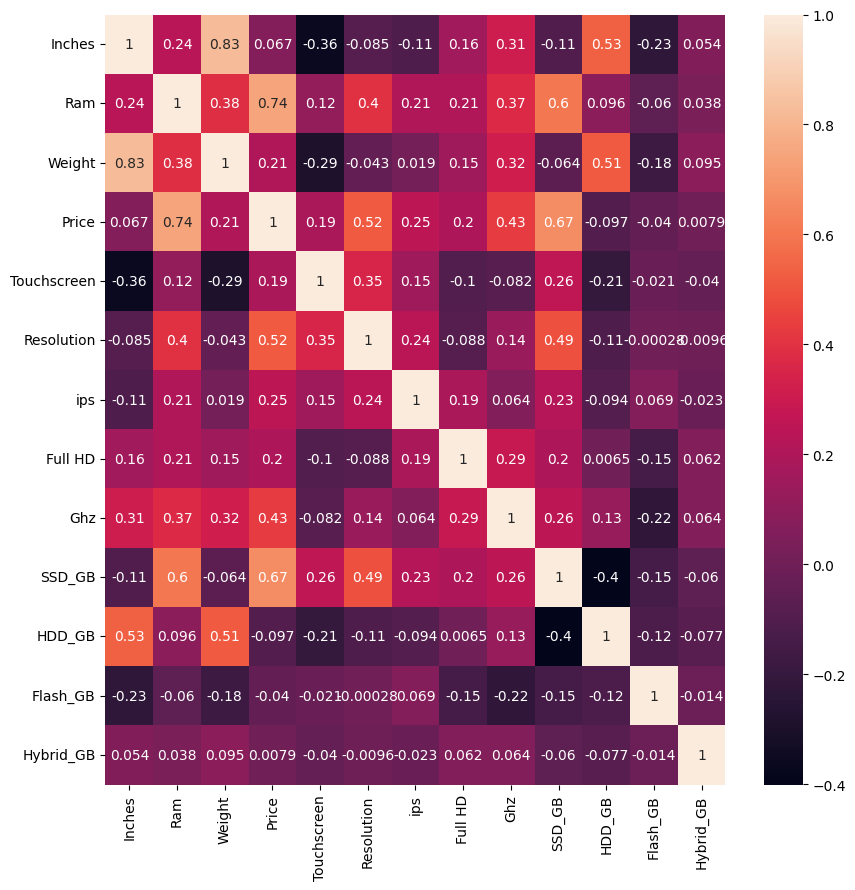

In [32]:
plt.figure(figsize = (10,10),dpi = 100)
sns.heatmap(data.corr(numeric_only = True),annot = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19372\460424880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

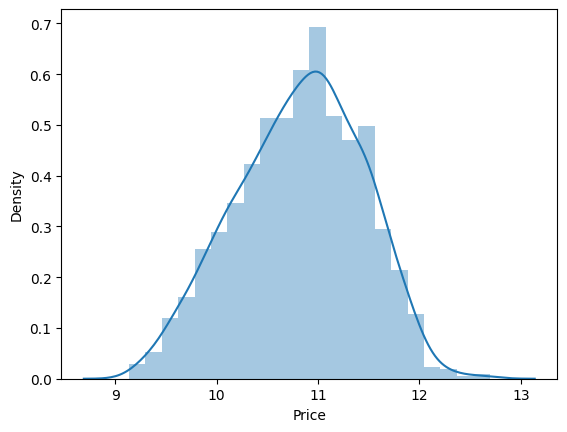

In [50]:
sns.distplot(np.log(data['Price']))

In [33]:
pd.set_option('display.max_columns',None)
data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,ips,Full HD,Ghz,Cpu Brand,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB,Gpu Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,MacOS,1.37,71378.6832,0,4096000,1,0,2.3,Intel Core i5,128,0,0,0,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,MacOS,1.34,47895.5232,0,1296000,0,0,1.8,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,2073600,0,1,2.5,Intel Core i5,256,0,0,0,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,MacOS,1.83,135195.3360,0,5184000,1,0,2.7,Intel Core i7,512,0,0,0,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,MacOS,1.37,96095.8080,0,4096000,1,0,3.1,Intel Core i5,256,0,0,0,Intel


In [31]:
data.drop(columns = ['Inches','ScreenResolution','Memory','Gpu','Flash_GB','Hybrid_GB'],inplace = True)

In [32]:
X = data.drop(columns = ['Price'])
Y = np.log(data['Price'])

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2,random_state=20)

In [105]:
x_train.head(0)

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,Resolution,ips,Full HD,Ghz,Cpu Brand,SSD_GB,HDD_GB,Gpu Brand


In [33]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

#### Linear Regression

In [38]:
step1 = ColumnTransformer(transformers = [
    ('Company',OneHotEncoder(drop = 'first',sparse_output=False,handle_unknown='ignore'),[0,1,3,10,13])],
    remainder = 'passthrough',n_jobs = True)

step2 = LinearRegression()

pipe1 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe1.fit(x_train,y_train)

y_pred = pipe1.predict(x_test)
print("Linear Regression r2_score is: ",r2_score(y_test,y_pred))

Linear Regression r2_score is:  0.8211285042580193


### Ridge

In [39]:
step1 = ColumnTransformer(transformers = [
    ('Company',OneHotEncoder(drop = 'first',sparse_output=False,handle_unknown='ignore'),[0,1,3,10,13])],
    remainder = 'passthrough',n_jobs = True)

step2 = Ridge(alpha = 0.9)

pipe2 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe2.fit(x_train,y_train)

y_pred = pipe2.predict(x_test)
print("Ridge Regression r2_score is: ",r2_score(y_test,y_pred))

Ridge Regression r2_score is:  0.8226511255016412


### SVR

In [ ]:
step1 = ColumnTransformer(transformers = [
    ('Company',OneHotEncoder(drop = 'first',sparse_output=False,handle_unknown='ignore'),[0,1,3,10,13])],
    remainder = 'passthrough',n_jobs = True)

paramgrid = {
    'kernel':['rbf','poly'],
    'degree':[2,3,4],
    'C':[1000,100,10]
}
step2 = GridSearchCV(estimator = SVR(),param_grid=paramgrid,scoring = 'r2',cv = 5,n_jobs = True)

pipe3 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe3.fit(x_train,y_train)

y_pred = pipe3.predict(x_test)
print("SVR r2_score is: ",r2_score(y_test,y_pred))

### DecisionTreeRegressor

In [40]:
step1 = ColumnTransformer(transformers = [
    ('Company',OneHotEncoder(drop = 'first',sparse_output=False,handle_unknown='ignore'),[0,1,3,10,13])],
    remainder = 'passthrough',n_jobs = True)

step2 = DecisionTreeRegressor(criterion='absolute_error')

pipe4 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe4.fit(x_train,y_train)

y_pred = pipe4.predict(x_test)
print("Ridge Regression r2_score is: ",r2_score(y_test,y_pred))

Ridge Regression r2_score is:  0.7862530416984742


### Randomforest

In [41]:
step1 = ColumnTransformer(transformers = [
    ('Company',OneHotEncoder(drop = 'first',sparse_output=False,handle_unknown='ignore'),[0,1,3,10,13])],
    remainder = 'passthrough',n_jobs = True)

step2 = RandomForestRegressor(n_estimators = 50,criterion='absolute_error',n_jobs = True)

pipe5 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe5.fit(x_train,y_train)

y_pred = pipe5.predict(x_test)
print("Ridge Regression r2_score is: ",r2_score(y_test,y_pred))

Ridge Regression r2_score is:  0.8513102307276068


### XGBoost

In [53]:
step1 = ColumnTransformer(transformers = [
    ('Company',OneHotEncoder(drop = 'first',sparse_output=False,handle_unknown='ignore'),[0,1,3,10,13])],
    remainder = 'passthrough',n_jobs = True)

step2 = StandardScaler()
step3 = XGBRegressor()

pipe6 = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('Step3',step3)
])

pipe6.fit(x_train,y_train)

y_pred = pipe6.predict(x_test)
print("Ridge Regression r2_score is: ",r2_score(y_test,y_pred))
# cross_val_score(pipe6,x_test,y_test,scoring = 'r2',cv = 5)

Ridge Regression r2_score is:  0.863935656586721


In [54]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe6,open('pipe.pkl','wb'))

In [63]:
x_test

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,Resolution,ips,Full HD,Ghz,Cpu Brand,SSD_GB,HDD_GB,Gpu Brand
467,Dell,Notebook,8,Windows,2.02,0,2073600,0,1,1.6,Intel Core i5,0,2000,AMD
931,HP,Ultrabook,4,Windows,1.26,0,2073600,0,1,2.3,Intel Core i5,0,500,Intel
1119,Asus,Gaming,8,Windows,3.52,0,2073600,0,1,2.6,Intel Core i7,128,1000,Nvidia
1057,Acer,Notebook,8,Windows,2.40,0,1049088,0,0,2.2,AMD,0,1000,AMD
471,HP,Notebook,8,Windows,1.90,0,2073600,0,1,2.5,Intel Core i5,0,500,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,HP,Notebook,8,Windows,1.43,0,2073600,0,1,2.3,Intel Core i5,256,0,Intel
825,Toshiba,Notebook,4,Windows,1.75,0,1049088,0,0,2.1,Other Intel,128,0,Intel
416,Dell,Notebook,4,Windows,1.65,0,1049088,0,0,2.0,Intel Core i3,128,0,Intel
265,Dell,2 in 1 Convertible,8,Windows,2.67,1,2073600,0,1,1.6,Intel Core i5,256,0,Intel


HDD_GB
0       603
1000    312
500     104
2000     20
128       1
32        1
Name: count, dtype: int64